In [105]:
################
## PURPOSE: Determine the mass of a far away black hole (BH), based on the hydrogen alpha emission spectrum
##          given off by the gas accreted by the BH.
## SYNTAX:  python <script.py>
## NOTES:   
## AUTHOR:  Jake Rosenzweig
## DATE:    2018-12-11
##########

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#####################
##### Constants #####
#####################
c = 299792458 # m/s
Msun = 1.9884754E30 # Kg
Koss_massBH = 5.5E+06*Msun

######################
##### Parameters #####
######################
d = 155 # Mpc, distance from BH to Earth
Halpha_flux = 0.242E-15 # W/(m^2)

with open('halpha.dat') as f:
    ## flux [W/(m^2)]
    wavelen_arr, flux_arr = np.loadtxt(f, unpack=True)

## Renormalize the data so that min flux = 0 
## also use values of flux on the order(10^1)
normflux_arr = ( flux_arr - flux_arr.min() )*1E15

In [107]:
#####################
##### Functions #####
#####################
def gauss(x,A,mean,sigma):
    return A/(np.sqrt(2*np.pi)*sigma) * np.exp( -1/2*(x-mean)*(x-mean)/sigma/sigma )

def doubleGauss(x,A1,mean1,sigma1,A2,mean2,sigma2):
    gauss1 = A1/(np.sqrt(2*np.pi)*sigma1) * np.exp( -1/2*(x-mean1)*(x-mean1)/sigma1/sigma1 )
    gauss2 = A2/(np.sqrt(2*np.pi)*sigma2) * np.exp( -1/2*(x-mean2)*(x-mean2)/sigma2/sigma2 )
    return gauss1 + gauss2

def massBH(lumi,fwhm):
    '''
    Using the luminosity (lumi) of the broad Hydrogen alpha line in Watts and the full-width 
    half-max (fwhm) of the emission line, calculate the mass of the black hole which is giving 
    off this radiation by the accretion of nearby gas.
    
    Strangely enough, we will convert the fwhm into velocity units...
    
    Arguments:
        lumi [W]
        fwhm [Km/s] (use fwhm/wavelength = v/c)
    '''
    return 1.3E6 * (lumi/1E35)**0.57 * (fwhm/1E3)**2.06 * Msun

def Plotter(newpopt):
    gauscurve2 = doubleGauss(x,newpopt[0],newpopt[1],newpopt[2],newpopt[3],newpopt[4],newpopt[5])
    
    plt.scatter(wavelen_arr,normflux_arr)
    plt.xlim(wavelen_arr.min()*0.999, wavelen_arr.max()*1.001)
    plt.ylim(normflux_arr.min()*0.999, normflux_arr.max()*1.001)
    plt.xlabel('$wavelength\ [Å]$')
    plt.ylabel("$flux of H\Alpha line \n [W/(m^2)]$")
    plt.plot(x,gauscurve,color='r')
    plt.plot(x,gauscurve2,color='k')
    plt.show()

The optimized parameters are:
A:	2.570936E+02 [W/(m^2)]
mean:	6.564149E+03 [m]
sigma:	1.781016E+01 [m]


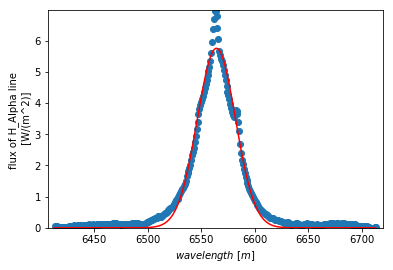

In [108]:
## Fit a Gaussian curve to the data
x = np.linspace(wavelen_arr.min(),wavelen_arr.max(),5000)

## Get optimized parameters for Gaussian
popt,pcov = curve_fit(gauss,wavelen_arr,normflux_arr,p0=(2500, 6560, 50))
gauscurve = gauss(x,popt[0],popt[1],popt[2])

print("The optimized parameters are:")
print("A:\t%.6E"%popt[0],"[W/(m^2)]")
print("mean:\t%.6E"%popt[1],"[m]")
print("sigma:\t%.6E"%popt[2],"[m]")

## Plot it to make sure the fit is OK
plt.scatter(wavelen_arr,normflux_arr)
plt.xlim(wavelen_arr.min()*0.999, wavelen_arr.max()*1.001)
plt.ylim(normflux_arr.min()*0.999, normflux_arr.max()*1.001)
plt.xlabel('$wavelength\ [m]$')
plt.ylabel("flux of H_Alpha line \n [W/(m^2)]")
plt.plot(x,gauscurve,color='r')
plt.show()

The optimized parameters of the broad curve are:
	single Gaussian	double Gaussian
A:	2.570936E+02 	2.495611E+02 [W/(m^2)]
mean:	6.564149E+03 	6.564286E+03 [m]
sigma:	1.781016E+01 	1.913415E+01 [m]


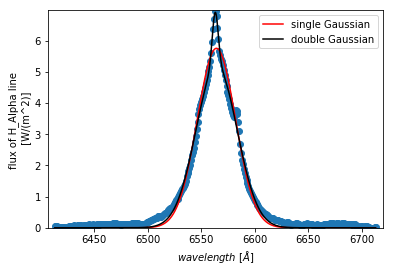

In [116]:
## Fit data with a DOUBLE Gaussian
popt2,pcov2 = curve_fit(doubleGauss,wavelen_arr,normflux_arr,p0=(250, 6564.15, 19, 12, 6564.15, 2.7))
print("The optimized parameters of the broad curve are:")
print("\tsingle Gaussian\tdouble Gaussian")
print("A:\t%.6E"%popt[0],"\t%.6E"%popt2[0],"[W/(m^2)]")
print("mean:\t%.6E"%popt[1],"\t%.6E"%popt2[1],"[m]")
print("sigma:\t%.6E"%popt[2],"\t%.6E"%popt2[2],"[m]")

gauscurve2 = doubleGauss(x,popt2[0],popt2[1],popt2[2],popt2[3],popt2[4],popt2[5])

## Plot it to make sure the fit is OK
plt.scatter(wavelen_arr,normflux_arr)
plt.xlim(wavelen_arr.min()*0.999, wavelen_arr.max()*1.001)
plt.ylim(normflux_arr.min()*0.999, normflux_arr.max()*1.001)
plt.xlabel('$wavelength\ [Å]$')
plt.ylabel("flux of H_Alpha line \n [W/(m^2)]")
plt.plot(x,gauscurve,color='r',label='single Gaussian')
plt.plot(x,gauscurve2,color='k',label='double Gaussian')
plt.legend()
plt.show()

In [113]:
print("""
The fit with a double Gaussian is quite better, even judging by eye. 
The curve captures either the two "wings" out at the side, or the narrow peak at the top.
We could try a triple Gaussian to get an even better fit.
This is encroaching in the area of "Gaussian Mixture Modeling" and it most likely 
an entirely different project!
""")


The fit with a double Gaussian is quite better, even judging by eye. 
The curve captures either the two "wings" out at the side, or the narrow peak at the top.
We could try a triple Gaussian to get an even better fit.
This is encroaching in the area of "Gaussian Mixture Modeling" and it most likely 
an entirely different project!



Using amplitude=0.5, sigma=4.0 new parameters: [2.49561907e+02 6.56428589e+03 1.91339942e+01 1.19031445e+01
 6.56304287e+03 2.76295331e+00]


/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


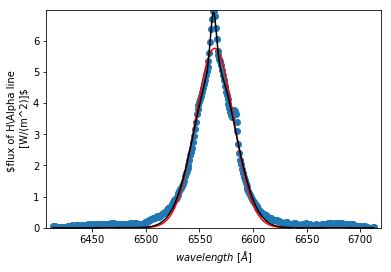

Using amplitude=0.5, sigma=5.0 new parameters: [2.49562009e+02 6.56428589e+03 1.91339732e+01 1.19029696e+01
 6.56304287e+03 2.76290671e+00]


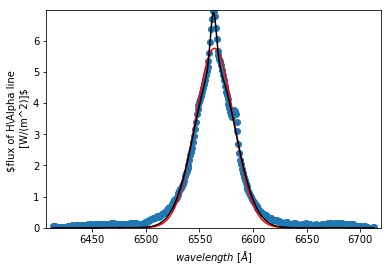

Using amplitude=0.5, sigma=6.5 new parameters: [ 209.37888834 6564.21987964   15.68117305   73.37793815 6561.28511396
   49.92914142]


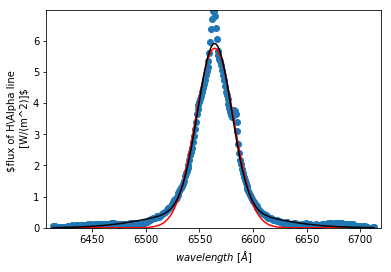

Using amplitude=0.5, sigma=7.5 new parameters: [2.49561865e+02 6.56428589e+03 1.91340024e+01 1.19032143e+01
 6.56304287e+03 2.76297197e+00]


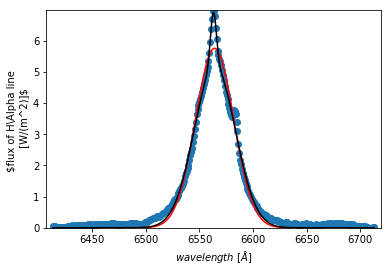

Using amplitude=0.5, sigma=8.0 new parameters: [2.49562065e+02 6.56428589e+03 1.91339624e+01 1.19028771e+01
 6.56304287e+03 2.76288195e+00]


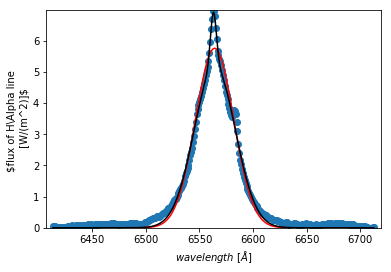

Using amplitude=0.5, sigma=9.0 new parameters: [2.49561985e+02 6.56428589e+03 1.91339784e+01 1.19030120e+01
 6.56304287e+03 2.76291797e+00]


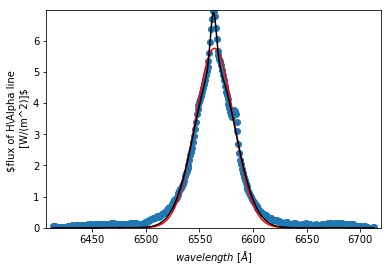

Using amplitude=0.5, sigma=9.5 new parameters: [2.49561823e+02 6.56428589e+03 1.91340109e+01 1.19032858e+01
 6.56304288e+03 2.76299105e+00]


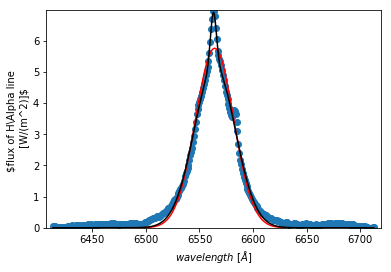

Using amplitude=0.5, sigma=12.0 new parameters: [2.49561878e+02 6.56428589e+03 1.91339998e+01 1.19031925e+01
 6.56304287e+03 2.76296617e+00]


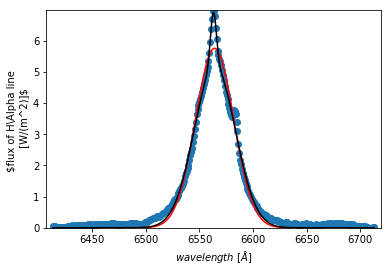

Using amplitude=0.5, sigma=12.5 new parameters: [2.49562096e+02 6.56428589e+03 1.91339562e+01 1.19028248e+01
 6.56304286e+03 2.76286796e+00]


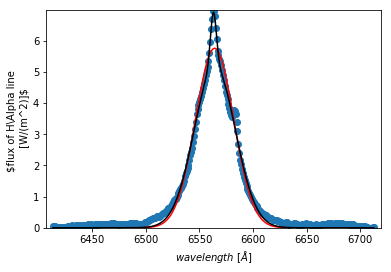

Using amplitude=0.5, sigma=13.0 new parameters: [2.49562057e+02 6.56428589e+03 1.91339642e+01 1.19028921e+01
 6.56304287e+03 2.76288593e+00]


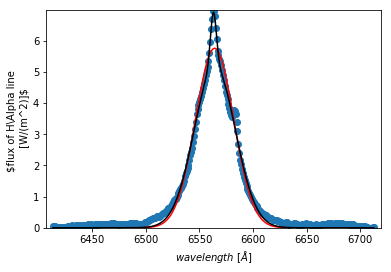

Using amplitude=0.5, sigma=14.0 new parameters: [2.49562013e+02 6.56428589e+03 1.91339730e+01 1.19029658e+01
 6.56304287e+03 2.76290561e+00]


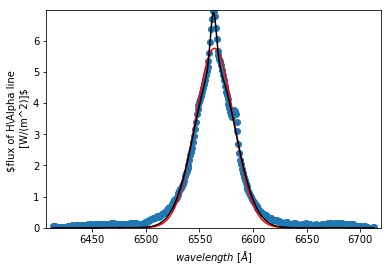

Using amplitude=0.5, sigma=14.5 new parameters: [2.49562009e+02 6.56428589e+03 1.91339737e+01 1.19029720e+01
 6.56304287e+03 2.76290726e+00]


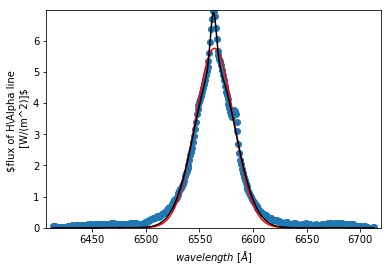

Using amplitude=0.5, sigma=17.0 new parameters: [2.49561878e+02 6.56428589e+03 1.91339999e+01 1.19031930e+01
 6.56304287e+03 2.76296625e+00]


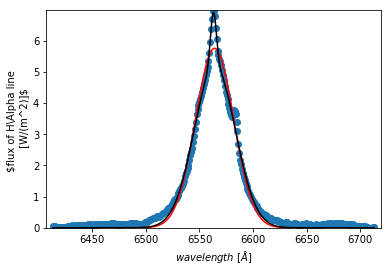

Using amplitude=0.5, sigma=17.5 new parameters: [2.49561839e+02 6.56428589e+03 1.91340080e+01 1.19032606e+01
 6.56304288e+03 2.76298429e+00]


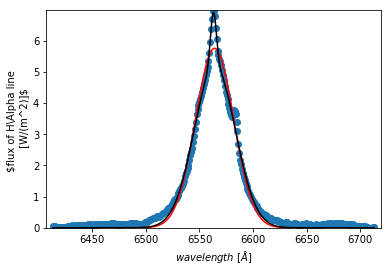

Using amplitude=0.5, sigma=34.5 new parameters: [5.46384901e-01 6.56412611e+03 3.14933869e+01 1.70652896e+01
 6.56419180e+03 3.74474902e-02]


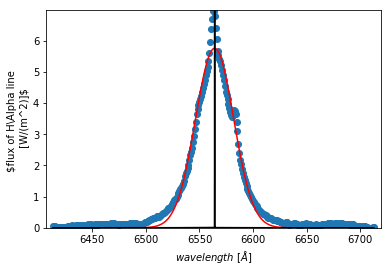

Using amplitude=0.5, sigma=36.0 new parameters: [5.15899678e-01 6.56414045e+03 3.48713837e+01 1.81024988e+01
 6.56419097e+03 3.57065908e-02]


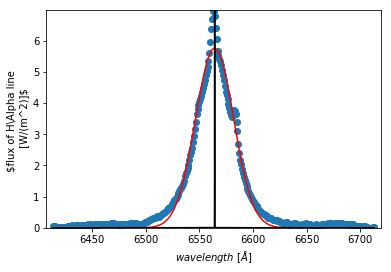

Using amplitude=0.5, sigma=36.5 new parameters: [5.11789967e-01 6.56414263e+03 3.56440541e+01 1.95812675e+01
 6.56419349e+03 3.56924022e-02]


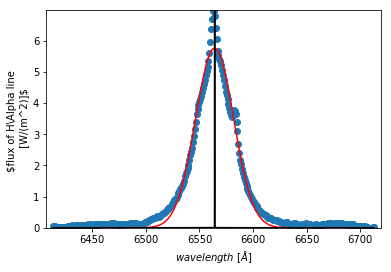

Using amplitude=0.5, sigma=37.0 new parameters: [5.05561292e-01 6.56414642e+03 3.65853600e+01 1.45271774e+01
 6.56418007e+03 3.26815997e-02]


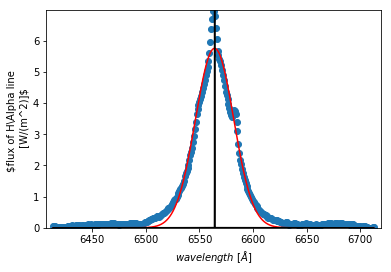

Using amplitude=0.5, sigma=38.5 new parameters: [5.01710786e-01 6.56414881e+03 3.83649518e+01 1.48537192e+01
 6.56417906e+03 3.12171141e-02]


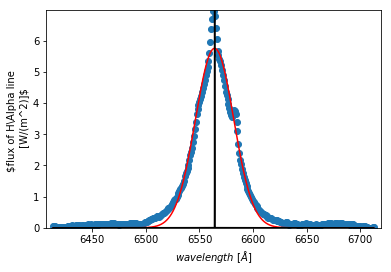

Using amplitude=0.5, sigma=39.5 new parameters: [5.00675723e-01 6.56414951e+03 3.94447638e+01 1.36539579e+01
 6.56417541e+03 2.97752492e-02]


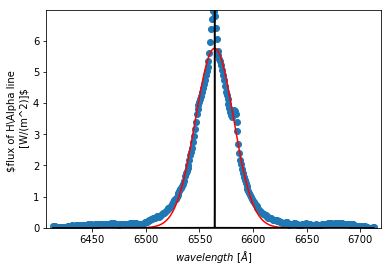

Using amplitude=0.5, sigma=40.0 new parameters: [5.00653267e-01 6.56414951e+03 3.99457248e+01 2.02050004e+01
 6.56418678e+03 3.13652883e-02]


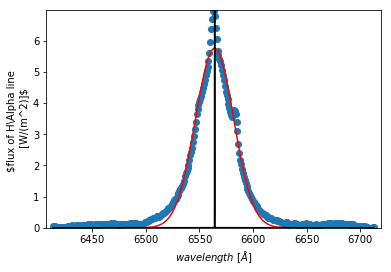

Using amplitude=0.5, sigma=40.5 new parameters: [5.00295721e-01 6.56414977e+03 4.04750145e+01 1.51857814e+01
 6.56417522e+03 2.90201647e-02]


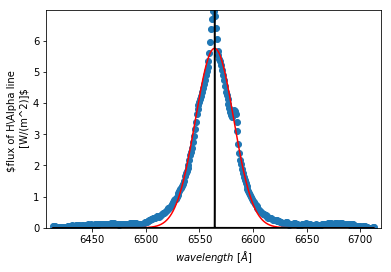

Using amplitude=0.5, sigma=41.0 new parameters: [5.00146321e-01 6.56414989e+03 4.09874368e+01 1.28541083e+01
 6.56416897e+03 2.76166599e-02]


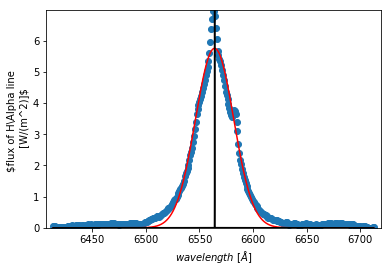

Using amplitude=0.5, sigma=41.5 new parameters: [5.00141027e-01 6.56414989e+03 4.14877004e+01 1.24240090e+01
 6.56417795e+03 2.87475436e-02]


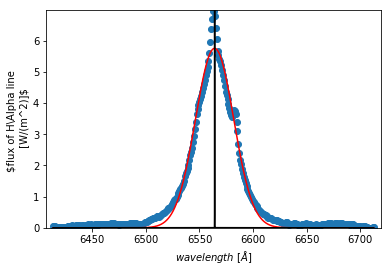

Using amplitude=0.5, sigma=42.5 new parameters: [ 209.38007977 6564.21987696   15.68121671   73.37712397 6561.28506029
   49.93012271]


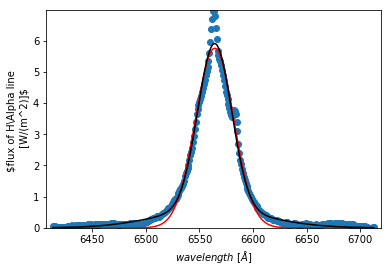

Using amplitude=0.5, sigma=43.0 new parameters: [5.00047251e-01 6.56414996e+03 4.29956866e+01 1.23968091e+01
 6.56418474e+03 2.87509049e-02]


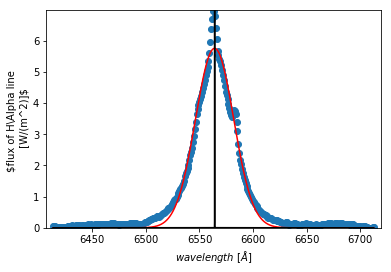

Using amplitude=0.5, sigma=43.5 new parameters: [ 209.37900117 6564.21987938   15.68117718   73.3778615  6561.28510886
   49.92923475]


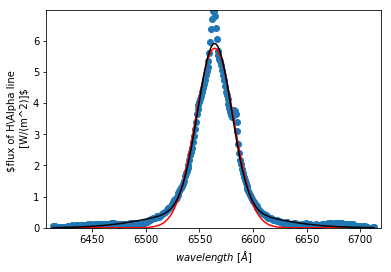

Using amplitude=0.5, sigma=44.0 new parameters: [ 209.3827073  6564.21987105   15.681313    -73.37532922 6561.28494209
  -49.93228766]


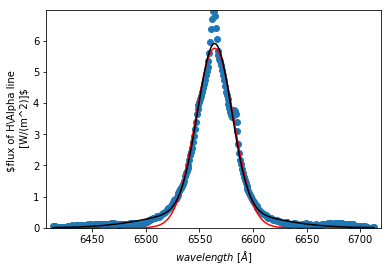

Using amplitude=0.5, sigma=44.5 new parameters: [ 209.37978407 6564.21987763   15.68120587   73.3773266  6561.28507366
   49.92987961]


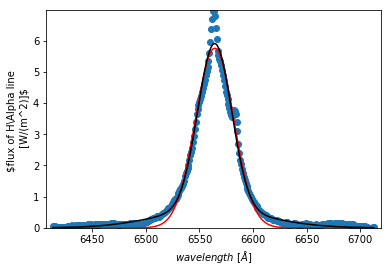

Using amplitude=0.5, sigma=45.0 new parameters: [ 209.37872049 6564.21988002   15.6811669   -73.37805278 6561.28512152
  -49.9290031 ]


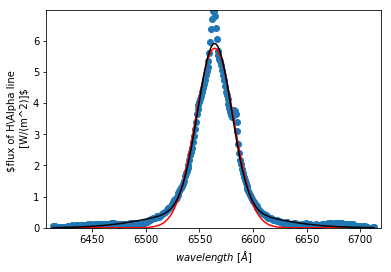

Using amplitude=0.5, sigma=45.5 new parameters: [ 209.38177101 6564.21987316   15.68127869   73.3759685  6561.28498421
   49.93151596]


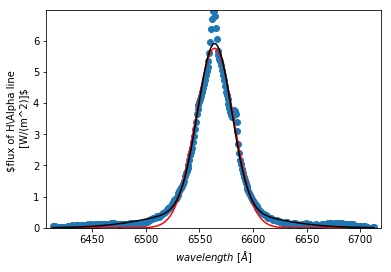

Using amplitude=1.0, sigma=1.0 new parameters: [ 209.34933707 6564.21994604   15.68009025   73.39813218 6561.28644614
   49.90481304]


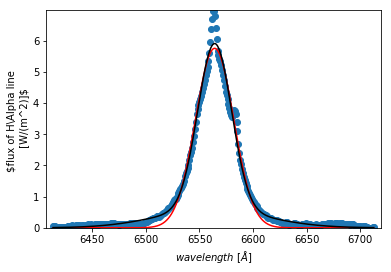

Using amplitude=1.0, sigma=2.0 new parameters: [2.49561319e+02 6.56428589e+03 1.91341122e+01 1.19041387e+01
 6.56304290e+03 2.76321879e+00]


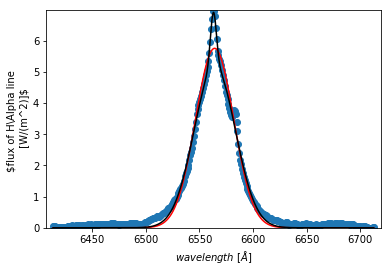

Using amplitude=1.0, sigma=3.5 new parameters: [ 209.38126219 6564.2198743    15.68126005   73.37631565 6561.2850071
   49.93109632]


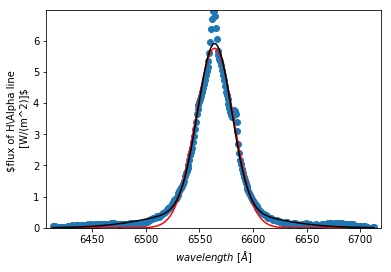

Using amplitude=1.0, sigma=4.0 new parameters: [2.49561173e+02 6.56428589e+03 1.91341415e+01 1.19043854e+01
 6.56304291e+03 2.76328465e+00]


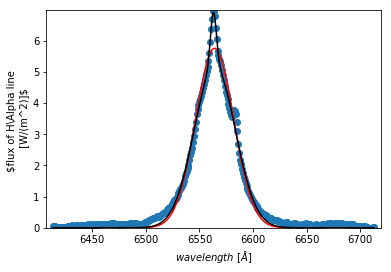

Using amplitude=1.0, sigma=4.5 new parameters: [2.49561257e+02 6.56428589e+03 1.91341246e+01 1.19042435e+01
 6.56304290e+03 2.76324675e+00]


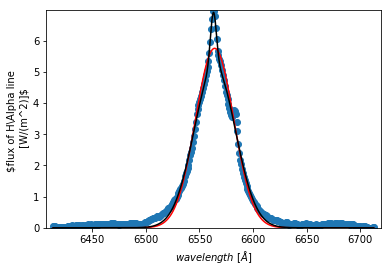

Using amplitude=1.0, sigma=9.0 new parameters: [2.49561825e+02 6.56428589e+03 1.91340106e+01 1.19032829e+01
 6.56304288e+03 2.76299024e+00]


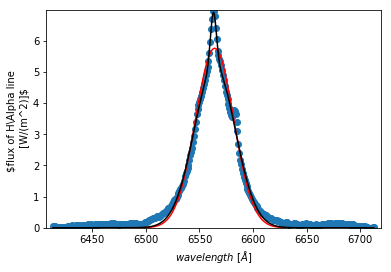

Using amplitude=1.0, sigma=9.5 new parameters: [2.49561941e+02 6.56428589e+03 1.91339875e+01 1.19030876e+01
 6.56304287e+03 2.76293813e+00]


KeyboardInterrupt: 

In [110]:
## Sample parameter space of amplitude and sigma to search for the mysterious "second Gaussian"
## This Gaussian should fit the "wings" on the left and right, and also the narrow peak
# for amp in np.arange(0.5,100,0.5):
#     for sigma in np.arange(0.5,200,0.5):
#         try:
#             newpopt,pcov = curve_fit(doubleGauss,wavelen_arr,normflux_arr,p0=(amp, 6564.15, sigma, 1/amp, 6564.15, 1/sigma))
#             if (abs(1.781015E+01-newpopt[2])>1) and newpopt[2]>0 and newpopt[0]>0 and abs(newpopt[1]-6564.15)<1:
#                 print("Using amplitude={}, sigma={} new parameters: {}".format(amp,sigma,newpopt))
#                 Plotter(newpopt)
                
#         except (ValueError, RuntimeError):
#             continue
# print("Done!")

In [125]:
## Find the FWHM (full-width half max) in Km/s using the first, broad Gaussian
fwhm = 2*popt[2]*np.sqrt(2*np.log(2)) # popt=sigma, which is in Å!
#fwhm = temp_fwhm/1E13

## Also find the x val which gives the max y val
# max_yval = gauscurve.max()
# max_xval = x[gauscurve.argmax()]

## Convert the FWHM into the speed of the gas
v = c*( fwhm/popt[1] )/1E3 # convert to Km/s

## Convert the observed flux into lumi:
## lumi = 4pi*d^2 * flux
dist = d*(3.09E22) # convert Mpc to m
lumi = 4*np.pi*dist*dist * Halpha_flux

(6.9759857565902875e+34,
 1915.4371416668262,
 4.7894999999999996e+24,
 2.42e-16,
 41.93973039615615,
 6564.149034084026)

In [138]:
## Calculate mass of BH!
mass_BH = massBH(lumi,v)

percdiff = (mass_BH - Koss_massBH)/((mass_BH + Koss_massBH)/2) * 100

print("""
So using the Hydrogen alpha emission line data from a black hole (BH),
which is approximately {0} Mpc away, and based on its total observed flux of {1} W/(m^2)
as measured on Earth, we have determined that the gas nearest the BH is traveling near 
{2:.2f} Km/s and is giving off the Gaussian-like emission spectrum with a mean of {3:.2f} Å.
All this information allows us to conclude a mass of the BH around {4:.2E} Kg,
or equivalently, {5:.1E} solar masses.

This is quite close to the reported mass of the same BH from Koss et al. of {6:.2E} solar masses,
giving a percent difference of: {7:.2f}%
""".format(d, Halpha_flux, v, popt[1], mass_BH, mass_BH/Msun, Koss_massBH, percdiff))


So using the Hydrogen alpha emission line data from a black hole (BH),
which is approximately 155 Mpc away, and based on its total observed flux of 2.42e-16 W/(m^2)
as measured on Earth, we have determined that the gas nearest the BH is traveling near 
1915.44 Km/s and is giving off the Gaussian-like emission spectrum with a mean of 6564.15 Å.
All this information allows us to conclude a mass of the BH around 8.03E+36 Kg,
or equivalently, 4.0E+06 solar masses.

This is quite close to the reported mass of the same BH from Koss et al. of 1.09E+37 solar masses,
giving a percent difference of: -30.63%

